In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [172]:
dataFrame = pd.read_csv("song_data.csv")
# Song Popularity Dataset (kaggle.com)

In [4]:
dataFrame.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [5]:
# Burada ilk olarak kolonları inceliyoruz.
# Elimizdeki veriseti şarkıların popülaritesini belirlerken hangi kriterleri önemsemiş bunları görüyoruz.
# Şimdi de verinin özetini inceleyeceğiz.

In [6]:
dataFrame.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


In [8]:
# 18835 şarkılık güzel bir veriseti
# Hedefimiz olan popülaritenin 0'dan 100'e kadar değerlendirildiğini ve ortalama olarak 52.99 bulunduğunu görüyoruz.
# Şimdi null(boş) değere sahip kolon olup olmadığını tespit etmemiz lazım

In [9]:
dataFrame.isnull().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

In [10]:
# null değere sahip kolon olmaması bizim için avantaj
# Şimdi verileri biraz görselleştirerek incelemeye çalışalım

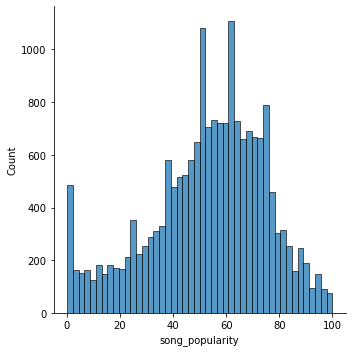

In [11]:
sbn.displot(dataFrame["song_popularity"])

In [13]:
# Normalde uç değerleri istemeyiz.
# Ancak bu durumda bir şarkının çok popüler olması veya hiç popüler olmaması olağandır.
# O yüzden verisetinin bu haliyle devam edeceğiz.
# Şimdi veriler arasındaki korelasyonu inceleyelim

In [14]:
dataFrame.corr()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
song_popularity,1.000000,-0.018899,-0.065181,0.104290,0.001365,-0.130907,-0.013160,-0.038937,0.099442,-0.004969,0.021479,-0.022672,0.034983,-0.052895
song_duration_ms,-0.018899,1.000000,-0.097882,-0.104985,0.092688,-0.015188,-0.004615,0.016086,0.016469,-0.026328,-0.083447,0.012791,0.000264,-0.063421
acousticness,-0.065181,-0.097882,1.000000,-0.182500,-0.662639,0.173098,-0.002025,-0.082537,-0.557744,0.064100,-0.093574,-0.136421,-0.157177,-0.121670
danceability,0.104290,-0.104985,-0.182500,1.000000,0.044373,-0.130483,0.007723,-0.090694,0.177639,-0.106539,0.213728,-0.121286,0.136391,0.332014
energy,0.001365,0.092688,-0.662639,0.044373,1.000000,-0.205914,0.020416,0.167143,0.755516,-0.051605,0.062053,0.162448,0.146265,0.316742
instrumentalness,-0.130907,-0.015188,0.173098,-0.130483,-0.205914,1.000000,-0.009463,-0.032887,-0.390248,-0.014983,-0.081138,-0.036934,-0.069181,-0.178570
key,-0.013160,-0.004615,-0.002025,0.007723,0.020416,-0.009463,1.000000,-0.008193,0.010452,-0.169848,0.033639,0.003239,-0.008282,0.025356
liveness,-0.038937,0.016086,-0.082537,-0.090694,0.167143,-0.032887,-0.008193,1.000000,0.102450,-0.001035,0.090845,0.031876,0.013289,0.013789
loudness,0.099442,0.016469,-0.557744,0.177639,0.755516,-0.390248,0.010452,0.102450,1.000000,-0.058506,0.078164,0.129938,0.119241,0.199696
audio_mode,-0.004969,-0.026328,0.064100,-0.106539,-0.051605,-0.014983,-0.169848,-0.001035,-0.058506,1.000000,-0.111627,0.020448,-0.024042,-0.004558


In [16]:
dataFrame.corr()["song_popularity"].sort_values()

instrumentalness   -0.130907
acousticness       -0.065181
audio_valence      -0.052895
liveness           -0.038937
tempo              -0.022672
song_duration_ms   -0.018899
key                -0.013160
audio_mode         -0.004969
energy              0.001365
speechiness         0.021479
time_signature      0.034983
loudness            0.099442
danceability        0.104290
song_popularity     1.000000
Name: song_popularity, dtype: float64

In [30]:
# Şarkıların popülerliğinine;
# En olumlu dans edilebilir olmasının
# En olumsuz da enstrümental olmasının etki ettiğini görüyoruz.
# Bunları grafikte incelemek istiyorum

<AxesSubplot:xlabel='danceability', ylabel='song_popularity'>

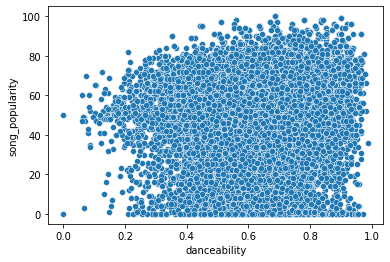

In [31]:
sbn.scatterplot(x="danceability", y="song_popularity", data=dataFrame)

<AxesSubplot:xlabel='instrumentalness', ylabel='song_popularity'>

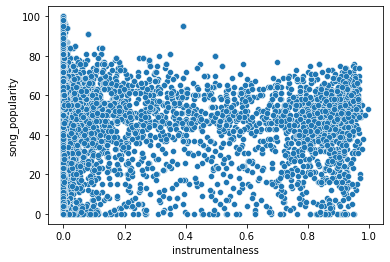

In [32]:
sbn.scatterplot(x="instrumentalness", y="song_popularity", data=dataFrame)

In [38]:
# Sayısal değer içermediği için şarkı isminin bulunduğu kolondan kurtulmamız lazım

In [39]:
LastDF = dataFrame.drop("song_name", axis=1)

In [40]:
LastDF.head()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [41]:
# Şimdi şarkı popülerliği bizim bulmak istediğimiz (y) değer olacak.
# Diğer kolonları ise x'e atayacağız.
# Bunun için diziler elde edeceğiz.

In [42]:
y = LastDF["song_popularity"].values
x = LastDF.drop("song_popularity", axis=1).values

In [43]:
y

array([73, 66, 76, ..., 23, 55, 60], dtype=int64)

In [44]:
x

array([[2.62333e+05, 5.52000e-03, 4.96000e-01, ..., 1.67060e+02,
        4.00000e+00, 4.74000e-01],
       [2.16933e+05, 1.03000e-02, 5.42000e-01, ..., 1.05256e+02,
        4.00000e+00, 3.70000e-01],
       [2.31733e+05, 8.17000e-03, 7.37000e-01, ..., 1.23881e+02,
        4.00000e+00, 3.24000e-01],
       ...,
       [1.82211e+05, 8.47000e-01, 7.19000e-01, ..., 1.30534e+02,
        4.00000e+00, 2.86000e-01],
       [3.52280e+05, 9.45000e-01, 4.88000e-01, ..., 1.06063e+02,
        4.00000e+00, 3.23000e-01],
       [1.93533e+05, 9.11000e-01, 6.40000e-01, ..., 9.14900e+01,
        4.00000e+00, 5.81000e-01]])

In [45]:
# Şimdi verileri test ve train olarak ayırmamız gerekiyor.

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=13)

In [49]:
# test size olarak %33 belirledim. Genel geçer kabul bu yönde.
# Şimdi ön süreç için verilerin fit ve transform edilmesi gerekiyor.

In [50]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
scaler = MinMaxScaler()

In [52]:
x_train = scaler.fit_transform(x_train)

In [53]:
x_test = scaler.transform(x_test)

In [54]:
# Şimdi modelimizi oluşturmamız gerekiyor.

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [56]:
x_train.shape

(12619, 13)

In [118]:
model = Sequential()

model.add(Dense (units=39, activation="relu"))
model.add(Dense (units=39, activation="relu"))
model.add(Dense (units=39, activation="relu"))
model.add(Dense (units=39, activation="relu"))
model.add(Dense (units=39, activation="relu"))
model.add(Dense (units=39, activation="relu"))
model.add(Dense (units=39, activation="relu"))

model.add(Dense (units=1))

model.compile(optimizer="adam", loss="mse")

In [119]:
model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), batch_size=310, epochs=378)

Epoch 1/378
41/41 [==============================] - 0s 3ms/step - loss: 3095.8860 - val_loss: 2223.2371
Epoch 2/378
41/41 [==============================] - 0s 2ms/step - loss: 824.4330 - val_loss: 499.0066
Epoch 3/378
41/41 [==============================] - 0s 2ms/step - loss: 509.9175 - val_loss: 489.5470
Epoch 4/378
41/41 [==============================] - 0s 2ms/step - loss: 496.8200 - val_loss: 478.6222
Epoch 5/378
41/41 [==============================] - 0s 2ms/step - loss: 484.5071 - val_loss: 465.8813
Epoch 6/378
41/41 [==============================] - 0s 2ms/step - loss: 474.1073 - val_loss: 458.0034
Epoch 7/378
41/41 [==============================] - 0s 2ms/step - loss: 468.0427 - val_loss: 453.8486
Epoch 8/378
41/41 [==============================] - 0s 2ms/step - loss: 463.8152 - val_loss: 449.8301
Epoch 9/378
41/41 [==============================] - 0s 2ms/step - loss: 463.6071 - val_loss: 448.3733
Epoch 10/378
41/41 [==============================] - 0s 2ms/step - los

Epoch 80/378
41/41 [==============================] - 0s 2ms/step - loss: 430.1571 - val_loss: 437.9041
Epoch 81/378
41/41 [==============================] - 0s 2ms/step - loss: 430.9520 - val_loss: 439.2173
Epoch 82/378
41/41 [==============================] - 0s 2ms/step - loss: 431.0300 - val_loss: 443.1703
Epoch 83/378
41/41 [==============================] - 0s 2ms/step - loss: 432.6324 - val_loss: 434.4321
Epoch 84/378
41/41 [==============================] - 0s 2ms/step - loss: 431.0336 - val_loss: 436.7253
Epoch 85/378
41/41 [==============================] - 0s 2ms/step - loss: 429.8160 - val_loss: 436.2990
Epoch 86/378
41/41 [==============================] - 0s 2ms/step - loss: 429.2934 - val_loss: 434.2789
Epoch 87/378
41/41 [==============================] - 0s 2ms/step - loss: 428.4474 - val_loss: 434.3333
Epoch 88/378
41/41 [==============================] - 0s 2ms/step - loss: 429.0673 - val_loss: 439.8888
Epoch 89/378
41/41 [==============================] - 0s 2ms/ste

41/41 [==============================] - 0s 2ms/step - loss: 415.4203 - val_loss: 433.7700
Epoch 159/378
41/41 [==============================] - 0s 2ms/step - loss: 415.9607 - val_loss: 432.5077
Epoch 160/378
41/41 [==============================] - 0s 2ms/step - loss: 415.8057 - val_loss: 435.4131
Epoch 161/378
41/41 [==============================] - 0s 2ms/step - loss: 415.0742 - val_loss: 435.4898
Epoch 162/378
41/41 [==============================] - 0s 2ms/step - loss: 414.7204 - val_loss: 434.3132
Epoch 163/378
41/41 [==============================] - 0s 2ms/step - loss: 416.6209 - val_loss: 433.3871
Epoch 164/378
41/41 [==============================] - 0s 2ms/step - loss: 417.1438 - val_loss: 433.2645
Epoch 165/378
41/41 [==============================] - 0s 2ms/step - loss: 413.7584 - val_loss: 433.5004
Epoch 166/378
41/41 [==============================] - 0s 2ms/step - loss: 414.7056 - val_loss: 445.4271
Epoch 167/378
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 401.2290 - val_loss: 440.7834
Epoch 237/378
41/41 [==============================] - 0s 2ms/step - loss: 403.1718 - val_loss: 430.8723
Epoch 238/378
41/41 [==============================] - 0s 2ms/step - loss: 404.1975 - val_loss: 439.8931
Epoch 239/378
41/41 [==============================] - 0s 2ms/step - loss: 404.7971 - val_loss: 434.5484
Epoch 240/378
41/41 [==============================] - 0s 2ms/step - loss: 402.7828 - val_loss: 432.3164
Epoch 241/378
41/41 [==============================] - 0s 2ms/step - loss: 401.9168 - val_loss: 434.5973
Epoch 242/378
41/41 [==============================] - 0s 2ms/step - loss: 403.4081 - val_loss: 445.8711
Epoch 243/378
41/41 [==============================] - 0s 2ms/step - loss: 402.7820 - val_loss: 430.1601
Epoch 244/378
41/41 [==============================] - 0s 2ms/step - loss: 400.4616 - val_loss: 432.4601
Epoch 245/378
41/41 [==============================] - 0s 2ms/step - 

41/41 [==============================] - 0s 2ms/step - loss: 387.1224 - val_loss: 432.8958
Epoch 315/378
41/41 [==============================] - 0s 2ms/step - loss: 387.2341 - val_loss: 442.6984
Epoch 316/378
41/41 [==============================] - 0s 2ms/step - loss: 388.1606 - val_loss: 438.5576
Epoch 317/378
41/41 [==============================] - 0s 2ms/step - loss: 386.0473 - val_loss: 435.9827
Epoch 318/378
41/41 [==============================] - 0s 2ms/step - loss: 388.9890 - val_loss: 436.8067
Epoch 319/378
41/41 [==============================] - 0s 2ms/step - loss: 384.4503 - val_loss: 433.7857
Epoch 320/378
41/41 [==============================] - 0s 2ms/step - loss: 385.2036 - val_loss: 439.2274
Epoch 321/378
41/41 [==============================] - 0s 2ms/step - loss: 390.9432 - val_loss: 459.7136
Epoch 322/378
41/41 [==============================] - 0s 2ms/step - loss: 386.4902 - val_loss: 435.5236
Epoch 323/378
41/41 [==============================] - 0s 2ms/step - 

In [120]:
# Şimdi loss verilerini incelememiz gerekiyor

In [121]:
LossData = pd.DataFrame(model.history.history)

In [122]:
LossData.head()

,loss,val_loss
0,3095.885986,2223.237061
1,824.432983,499.006561
2,509.917480,489.547028
3,496.820038,478.622192
4,484.507080,465.881317


<AxesSubplot:>

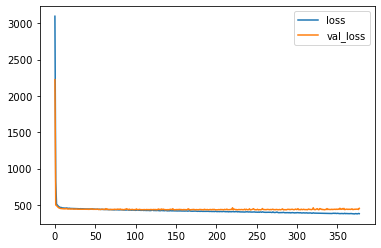

In [123]:
LossData.plot()

In [124]:
# Güzel bir loss grafiği elde ettik.
# Herhangi bir overfitting ile karşılaşmadık.

In [125]:
# Şimdi tahminlerin doğruluğunu inceleyeceğiz.

In [126]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [127]:
Tahminler = model.predict(x_test)

In [128]:
Tahminler

array([[53.732655],
       [64.29759 ],
       [52.48147 ],
       ...,
       [53.88639 ],
       [55.503723],
       [45.159245]], dtype=float32)

In [129]:
mean_absolute_error(y_test, Tahminler)

16.414897124682152

In [130]:
LastDF.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


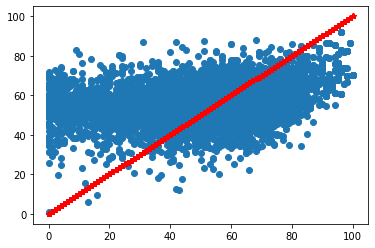

In [131]:
plt.scatter(y_test, Tahminler)
plt.plot(y_test, y_test, "r-*")

In [173]:
# Grafikte uç değerlerde uyumsuzluk görüyoruz.
# Ama daha iyi anlamak için denemeler yapmamız gerekecek
# Şimdi birkaç tahmin kontrolü yapacağız.
# Bunun için sırayla rastgele belirlediğim 13., 999., 2503., 13787. ve 17813. verileri deneyeceğim.

In [133]:
LastDF.iloc[13]

song_popularity         81.0000
song_duration_ms    269000.0000
acousticness             0.0179
danceability             0.6180
energy                   0.9380
instrumentalness         0.0000
key                      9.0000
liveness                 0.1670
loudness                -3.4420
audio_mode               1.0000
speechiness              0.0456
tempo                   91.4550
time_signature           4.0000
audio_valence            0.8750
Name: 13, dtype: float64

In [136]:
TahminKontrol = LastDF.drop("song_popularity",axis=1).iloc[13]
TahminKontrol = scaler.transform(TahminKontrol.values.reshape(-1,13))
model.predict(TahminKontrol)

array([[60.13637]], dtype=float32)

In [146]:
60.13637 / 81

0.7424243209876543

In [148]:
# %74.242 doğruluk (1.DEĞER)

In [149]:
LastDF.iloc[999]

song_popularity         57.00000
song_duration_ms    263280.00000
acousticness             0.00131
danceability             0.41700
energy                   0.94600
instrumentalness         0.00000
key                     10.00000
liveness                 0.15400
loudness                -4.05600
audio_mode               0.00000
speechiness              0.05070
tempo                   95.24500
time_signature           4.00000
audio_valence            0.51700
Name: 999, dtype: float64

In [150]:
TahminKontrol = LastDF.drop("song_popularity",axis=1).iloc[999]
TahminKontrol = scaler.transform(TahminKontrol.values.reshape(-1,13))
model.predict(TahminKontrol)

array([[48.595356]], dtype=float32)

In [151]:
48.595356 / 57

0.8525501052631579

In [152]:
# %85.255 doğruluk (2.DEĞER)

In [153]:
LastDF.iloc[2503]

song_popularity         57.0000
song_duration_ms    164960.0000
acousticness             0.0102
danceability             0.6460
energy                   0.9770
instrumentalness         0.7690
key                      9.0000
liveness                 0.2010
loudness                 1.5850
audio_mode               0.0000
speechiness              0.1670
tempo                  123.0160
time_signature           4.0000
audio_valence            0.6060
Name: 2503, dtype: float64

In [154]:
TahminKontrol = LastDF.drop("song_popularity",axis=1).iloc[2503]
TahminKontrol = scaler.transform(TahminKontrol.values.reshape(-1,13))
model.predict(TahminKontrol)

array([[51.712067]], dtype=float32)

In [155]:
51.712067 / 57

0.9072292456140351

In [156]:
# %90.723 doğruluk (3.DEĞER)

In [157]:
LastDF.iloc[13787]

song_popularity         35.000000
song_duration_ms    395520.000000
acousticness             0.000356
danceability             0.749000
energy                   0.771000
instrumentalness         0.004020
key                      8.000000
liveness                 0.085300
loudness                -4.121000
audio_mode               1.000000
speechiness              0.197000
tempo                  127.981000
time_signature           4.000000
audio_valence            0.515000
Name: 13787, dtype: float64

In [158]:
TahminKontrol = LastDF.drop("song_popularity",axis=1).iloc[13787]
TahminKontrol = scaler.transform(TahminKontrol.values.reshape(-1,13))
model.predict(TahminKontrol)

array([[68.16479]], dtype=float32)

In [160]:
35 / 68.16479

0.5134615686485647

In [161]:
# % 51.346 doğruluk (4.DEĞER)

In [162]:
LastDF.iloc[17813]

song_popularity         85.0000
song_duration_ms    164640.0000
acousticness             0.6600
danceability             0.7690
energy                   0.4790
instrumentalness         0.0000
key                      1.0000
liveness                 0.0914
loudness                -5.3390
audio_mode               1.0000
speechiness              0.0385
tempo                   96.0510
time_signature           4.0000
audio_valence            0.8030
Name: 17813, dtype: float64

In [163]:
TahminKontrol = LastDF.drop("song_popularity",axis=1).iloc[17813]
TahminKontrol = scaler.transform(TahminKontrol.values.reshape(-1,13))
model.predict(TahminKontrol)

array([[67.52616]], dtype=float32)

In [164]:
67.52616 / 85

0.7944254117647059

In [165]:
# %79.443 doğruluk (5.DEĞER)

In [168]:
# 5 Değerin Ortalamasını Aldığımzda;
(74.242 + 85.255 + 90.723 + 51.346 + 79.443) / 5

76.2018

In [169]:
# 5 değerin ortalamasında %76'lık bir oran tutturduk.

# RAPOR

In [174]:
# 1.) Çalışmaya farklı parametlere bağlı olarak şarkıların popülerliğinin
# sunulduğu bir verisetiyle başladım.

# 2.) Yaptığım çalışma sonucunda seçtiğim 5 rastgele değer ile ortalama 
# olarak %76'lık bir doğruluk oranı buldum.

# 3.) Grafikleri ve verileri incelediğimde, ortalama popülerliğe sahip 
# şarkıları (yaklaşık olarak 40-85 arası) yüksek doğruluk oranıyla tahmin 
# ettiğimi gördüm.

# 4.) Popülerliği çok az veya çok fazla olan şarkılarda ise sapmayla 
# karşılaştım.

# 5.) Bunun sebebi uç verilerde oynama yapmamış olmam olabilir. Çünkü bir 
# şarkının çok popüler olması (100 puan) veya hiç popüler olmaması
# (0 puan) bana olağan gözüktüğü için herhangi bir veri çıkarması yapmadım.

# 6.) Verilerin %99'uyla da değil %100'üyle çalıştım.

# 7.) Yapay zeka modelimi kurarken herhangi bir overfitting ile 
# karşılaşmadım. O yüzden dropout veya earlystopping'e ihtiyaç duymadım.

# 8.) Veri üzerinde daha geniş bir temizleme ile daha verimli sonuçlar elde
# edilebilir. Ancak kurduğum bu modelle de ortalama popülerliğe sahip
# olacak şarkılar yüksek doğruluk oranıyla tahmin edilebilir.